In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
!pip install lazypredict

In [2]:
import plotly.express as px
import pandas as pd
import numpy as np

coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEPP/input_files/distan_lat42.77lon-1.647p3R12Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [3]:
import pandas as pd
import numpy as np

station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEPP/input_files/LEPP2018.csv",
                          usecols =["time","wxcodes_o"],
                          parse_dates=["time"]).dropna().set_index("time")

pd.options.display.max_rows = 999
print("Weather frequencies\n")
station["wxcodes_o"].value_counts(normalize=True).map(lambda n: '{:.2%}'.format(n))

Weather frequencies



M                 85.30%
-RA                5.22%
BR                 1.67%
FG                 1.38%
RA                 0.97%
BCFG               0.61%
-RA BR             0.36%
VCFG               0.32%
BR BCFG            0.31%
FZFG               0.27%
VCTS               0.25%
TS                 0.24%
RA BR              0.23%
-SHRA              0.23%
-TSRA              0.21%
-SN                0.21%
-DZ                0.20%
-UP                0.20%
SHRA               0.18%
SN                 0.16%
TSRA               0.10%
VCSH               0.07%
-DZ BR             0.07%
BCFG BR            0.07%
TS SHRA            0.06%
+RA                0.06%
-SNRA              0.06%
UP                 0.06%
TS -SHRA           0.05%
RASN               0.05%
SN FZFG            0.05%
+SHRA              0.04%
BR -RA             0.04%
-RA FG             0.04%
BR VCFG            0.03%
-SN FZFG           0.03%
-FZUP BR           0.03%
VCTS -SHRA         0.03%
DZ                 0.03%
-UP BR             0.03%


In [4]:
#label sn

station["sn_l"] = "No SN"
mask = station['wxcodes_o'].str.contains("SN")
station.loc[mask,["sn_l"]] = "SN"


print(station.sample(50))
print("*****************************")
station["sn_l"].value_counts(normalize=True).transform(lambda x: '{:,.0%}'.format(x))

                    wxcodes_o   sn_l
time                                
2018-03-21 03:30:00         M  No SN
2018-07-03 01:00:00         M  No SN
2018-12-04 06:00:00        FG  No SN
2018-06-09 11:00:00         M  No SN
2018-05-28 13:00:00         M  No SN
2018-04-27 01:00:00         M  No SN
2018-06-14 00:00:00         M  No SN
2018-03-12 19:00:00         M  No SN
2018-07-12 03:30:00         M  No SN
2018-01-02 12:30:00         M  No SN
2018-11-13 19:00:00         M  No SN
2018-07-24 04:00:00         M  No SN
2018-04-07 03:00:00       -RA  No SN
2018-11-05 14:30:00         M  No SN
2018-09-28 04:00:00         M  No SN
2018-04-29 18:48:00     -SHRA  No SN
2018-10-06 12:30:00         M  No SN
2018-12-07 16:00:00         M  No SN
2018-03-12 16:00:00         M  No SN
2018-10-21 02:30:00         M  No SN
2018-03-27 00:30:00         M  No SN
2018-02-07 13:30:00         M  No SN
2018-07-11 14:00:00         M  No SN
2018-05-06 11:00:00         M  No SN
2018-08-19 19:30:00         M  No SN
2

No SN    99%
SN        1%
Name: sn_l, dtype: object

**Forecast D1**

In [5]:
#Forecast d1
model1k = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEPP/input_files/lat42.77lon-1.647p3R12KmD1.csv",parse_dates=["time"]).set_index("time")

model1k

,Unnamed: 0,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape2,cin2,cfh2,cfl2,cfm2,cft2,HGT5002,HGT8502,T5002,T8502
time,,,,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00,0,212.810684,0.0,1204.263184,2.763654,9.542564,102839.890625,281.275116,0.947388,22412.476562,...,0.00,0.000469,0.00000,0.468750,0.093750,0.468750,5607.215820,1578.078003,252.732269,275.716339
2018-01-02 01:00:00,1,219.902222,0.0,1239.573364,2.314501,3.172857,102786.210938,281.294525,0.942502,24212.171875,...,0.00,-0.003242,0.00000,0.445312,0.054688,0.445312,5612.247070,1574.463013,253.178864,275.794250
2018-01-02 02:00:00,2,207.281235,0.0,1272.054932,2.600275,3.666056,102732.492188,280.760559,0.957805,16212.355469,...,0.00,0.003242,0.00000,0.585938,0.484375,0.585938,5611.367188,1570.259033,253.765778,275.807709
2018-01-02 03:00:00,3,192.515350,0.0,1294.618164,2.184818,3.098562,102700.179688,280.855927,0.977439,16412.923828,...,0.00,-0.003906,0.34375,0.640625,0.585938,0.640625,5613.012207,1569.241943,253.932220,276.248291
2018-01-02 04:00:00,4,191.211334,0.0,1286.428467,3.427353,4.461230,102694.937500,281.143433,0.951643,24214.121094,...,1.95,-9.202851,0.00000,0.266460,0.289062,0.289062,5614.570801,1565.439941,254.208084,275.869568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-01 19:00:00,8731,344.859467,0.0,1728.522583,7.440048,11.918997,103544.250000,278.996826,0.968763,24035.839844,...,0.00,0.001641,0.00000,0.156830,0.000000,0.156830,5743.180176,1633.011963,255.708374,282.949585
2019-01-01 20:00:00,8732,345.285889,0.0,1709.658203,7.653408,12.149794,103542.710938,278.911560,0.955455,24037.287109,...,0.00,-0.003359,0.00000,0.028191,0.000000,0.028191,5742.202148,1632.599976,255.604370,282.798309
2019-01-01 21:00:00,8733,344.544983,0.0,1704.850708,7.664435,12.332341,103549.656250,278.855560,0.945516,24037.503906,...,0.00,-0.001055,0.00000,0.000000,0.000000,0.000000,5741.512207,1633.116943,255.559067,282.708557


In [6]:
#concat station file versus meteorological model file same time
df_all1k = pd.concat([station,model1k],axis=1).drop(columns=["wxcodes_o","Unnamed: 0"]).dropna()
df_all1k.sample(20)

,sn_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape2,cin2,cfh2,cfl2,cfm2,cft2,HGT5002,HGT8502,T5002,T8502
time,,,,,,,,,,,,,,,,,,,,,
2018-01-30 16:00:00,No SN,345.556854,0.0,1497.370239,0.726178,0.745897,102847.898438,284.757233,0.666346,24219.234375,...,0.000000,0.002813,0.000000,0.000000,0.00000,0.000000,5640.541992,1592.271973,252.718994,278.618774
2018-07-11 08:00:00,No SN,354.300232,0.0,2611.940430,5.726625,7.467123,101875.882812,292.277496,0.807020,24217.197266,...,0.000000,-0.009375,0.000000,0.000000,0.00000,0.000000,5738.149902,1537.641968,262.214691,286.659485
2018-09-18 08:00:00,No SN,123.476509,0.0,2586.660400,2.519755,4.620406,101806.171875,289.673828,0.900175,24213.558594,...,0.000000,0.000977,0.220000,0.242188,0.10000,0.242188,5737.557129,1535.983032,261.303986,287.305634
2018-11-28 20:00:00,No SN,137.198792,0.0,2002.846191,4.459316,7.934548,102333.507812,280.519775,0.761003,24222.750000,...,0.000000,-0.003906,0.300000,0.000000,0.00000,0.300000,5687.203125,1541.083008,259.711243,282.559601
2018-09-23 14:00:00,No SN,346.370331,0.0,3115.072266,4.723562,5.198693,102459.773438,299.399109,0.572001,24212.611328,...,0.000000,-0.003281,0.093750,0.000000,0.00000,0.093750,5846.833984,1614.631958,265.558441,289.008667
2018-10-16 19:00:00,No SN,356.468933,0.0,1951.143433,4.286076,7.843710,101720.812500,286.179138,0.908959,24213.289062,...,0.000000,0.000813,0.000000,0.000000,0.00000,0.000000,5636.024902,1508.394043,257.389130,282.624329
2018-03-27 06:00:00,No SN,250.454025,0.0,1299.373901,2.491041,10.332273,102372.476562,279.508881,0.988082,24217.794922,...,0.610000,-0.000438,0.140625,0.843750,0.00000,0.843750,5618.569824,1529.276001,256.147614,276.102417
2018-08-08 05:00:00,No SN,354.578003,0.0,2597.886963,4.580492,7.552835,101540.007812,289.330353,0.918070,24212.365234,...,0.000000,0.000000,0.000000,0.468750,0.00000,0.468750,5728.541016,1507.510010,262.989990,287.004608
2018-03-21 01:00:00,No SN,357.258240,0.0,134.941345,10.090352,18.208302,102639.531250,274.094574,0.910017,24218.101562,...,0.000000,-0.002188,0.000000,0.015625,0.00000,0.015625,5453.341797,1511.333008,245.207504,267.993164


**Scatter plot significant meteorological variables and sn_l**

No SN    498
SN         2
Name: sn_l, dtype: int64

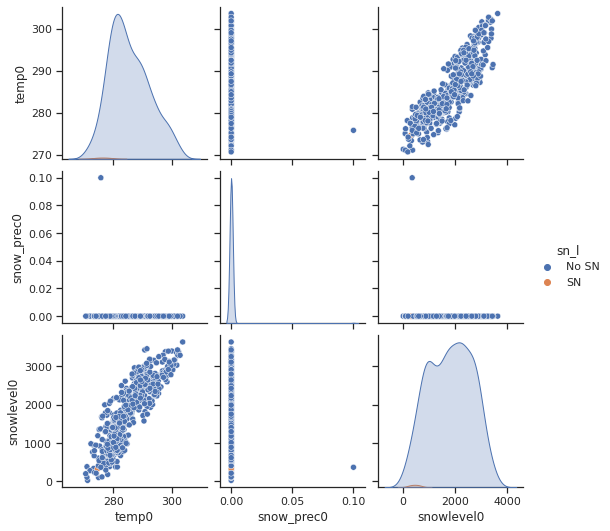

In [7]:
import seaborn as sns
np.random.seed(1)
sns.set_theme(style="ticks")
df = df_all1k[["sn_l","temp0","snow_prec0","snowlevel0"]].sample(500)
sns.pairplot(df, hue="sn_l");
df["sn_l"].value_counts()

In [8]:
import plotly.express as px

fig = px.scatter_3d(df, x='temp0', y='snow_prec0', z='snowlevel0', color='sn_l')
fig.show()

**Scatter plot 3 PCA variables and sn_l**

No SN    8591
SN         51
Name: sn_l, dtype: int64

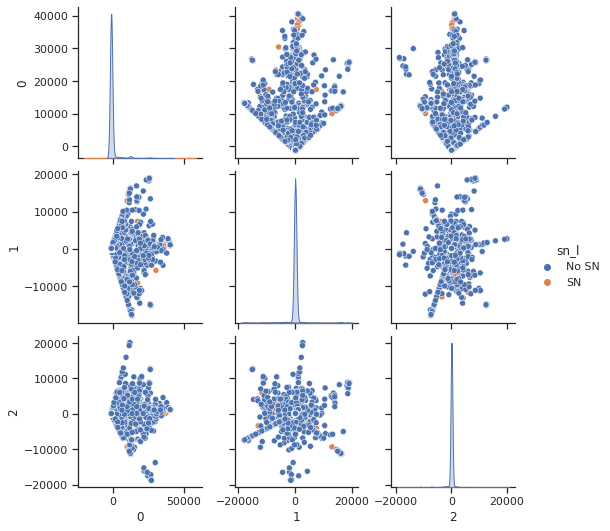

In [9]:
from sklearn.decomposition import PCA

df_pca = pd.DataFrame(PCA(n_components=3).fit_transform(df_all1k.iloc[:,1:]),
                                                        index =df_all1k.index)
df_pca["sn_l"] = df_all1k.sn_l

sns.pairplot(df_pca, hue="sn_l");
df_pca["sn_l"].value_counts()

**Meteorological model score Heidke Skill Score (HSS)**

In [10]:
from sklearn.metrics import classification_report

# HSS point 0
print("HSS point 0")
y_pred = np.asarray(["SN" if c>0 else "No SN" for c in df_all1k.snow_prec0])
concat = pd.DataFrame({"y_pred":y_pred, "sn_l":df_all1k.sn_l})
cm = pd.crosstab(concat.sn_l,concat.y_pred ,margins=True,)
print(cm)
a = cm.values[0,0]
b = cm.values[1,0]
c = cm.values[0,1]
d = cm.values[1,1]
HSS_met0 = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
print("Heidke Skill Score:",round(HSS_met0,2))

print("\nQuality report Meteorological model point 0")
print(pd.DataFrame(classification_report(concat.sn_l, concat.y_pred,output_dict=True)).T)

# HSS point 1
print("\nHSS point 1")
y_pred = np.asarray(["SN" if c>0 else "No SN" for c in df_all1k.snow_prec1])
concat = pd.DataFrame({"y_pred":y_pred, "sn_l":df_all1k.sn_l})
cm = pd.crosstab(concat.sn_l,concat.y_pred ,margins=True,)
print(cm)
a = cm.values[0,0]
b = cm.values[1,0]
c = cm.values[0,1]
d = cm.values[1,1]
HSS_met1 = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
print("Heidke Skill Score:",round(HSS_met1,2))

print("\nQuality report Meteorological model point 1")
print(pd.DataFrame(classification_report(concat.sn_l, concat.y_pred,output_dict=True)).T)

HSS point 0
y_pred  No SN  SN   All
sn_l                   
No SN    8581  10  8591
SN         41  10    51
All      8622  20  8642
Heidke Skill Score: 0.28

Quality report Meteorological model point 0
              precision    recall  f1-score      support
No SN          0.995245  0.998836  0.997037  8591.000000
SN             0.500000  0.196078  0.281690    51.000000
accuracy       0.994099  0.994099  0.994099     0.994099
macro avg      0.747622  0.597457  0.639364  8642.000000
weighted avg   0.992322  0.994099  0.992816  8642.000000

HSS point 1
y_pred  No SN  SN   All
sn_l                   
No SN    8576  15  8591
SN         40  11    51
All      8616  26  8642
Heidke Skill Score: 0.28

Quality report Meteorological model point 1
              precision    recall  f1-score      support
No SN          0.995357  0.998254  0.996804  8591.000000
SN             0.423077  0.215686  0.285714    51.000000
accuracy       0.993636  0.993636  0.993636     0.993636
macro avg      0.709217  

**Test association between observed variable and machine learning forecast (Pearson’s chi square test). Significance level (alpha) = 0.01**

In [11]:
from scipy.stats import chi2_contingency

#only cm point 1 similar point 0

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
sta, p, dof, exp = chi2_contingency(cm.iloc[0:2,0:2])

#degrees of freedoom (rows-1)*(columns-1) to test association between two variables
alpha = 0.01
print('\np-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Stadistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between meteorological model forecast and observed values")
else:
    print("Retain H0,There is no association between meteorological model forecast and observed values")


p-value: 4.1367231700376875e-155
Significance level: 0.01
Degres of of freedom:  1
Stadistic 703.9504491255416
Reject H0,There is an association between meteorological model forecast and observed values


In [12]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_all1k.sn_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)


100%|██████████| 29/29 [00:20<00:00,  1.40it/s]


In [13]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.80,0.81,None,0.88,0.10
AdaBoostClassifier,1.00,0.77,None,1.00,3.47
ExtraTreesClassifier,1.00,0.77,None,1.00,0.47
DecisionTreeClassifier,0.99,0.77,None,0.99,0.31
RandomForestClassifier,1.00,0.73,None,1.00,1.88
LGBMClassifier,1.00,0.73,None,1.00,1.26
KNeighborsClassifier,1.00,0.73,None,0.99,0.42
GaussianNB,0.88,0.71,None,0.93,0.07
LabelPropagation,0.99,0.68,None,0.99,3.52


**ML LGBMClassifier**

In [14]:
# variables X
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'dir2', 'snow_prec2', 'snowlevel2', 'mod2',
       'wind_gust2', 'mslp2', 'temp2', 'rh2', 'visibility2', 'lhflx2',
       'lwflx2', 'conv_prec2', 'prec2', 'swflx2', 'shflx2', 'cape2', 'cin2',
       'cfh2', 'cfl2', 'cfm2', 'cft2', 'HGT5002', 'HGT8502', 'T5002', 'T8502'],
      dtype='object')


Confusion matrix  (Machine Learning)

col_0  No SN  SN   All
sn_l                  
No SN   1715   6  1721
SN         4   4     8
All     1719  10  1729
Heidke Skill Score: 0.44

Quality report (Machine Learning)

              precision  recall  f1-score  support
No SN              1.00    1.00      1.00  1721.00
SN                 0.40    0.50      0.44     8.00
accuracy           0.99    0.99      0.99     0.99
macro avg          0.70    0.75      0.72  1729.00
weighted avg       0.99    0.99      0.99  1729.00

Confusion matrix  (Machine Learning)

col_0  No SN  SN   All
sn_l                  
No SN   1716   3  1719
SN         5   5    10
All     1721   8  1729
Heidke Skill Score: 0.55

Quality report (Machine Learning)

              precision  recall  f1-score  support
No SN              1.00    1.00      1.00  1719.00
SN                 0.62    0.50      0.56    10.00
accuracy           1.00    1.00      1.00     1.00
macro avg          0.81    0.75      0.78  1729.00
weighted 

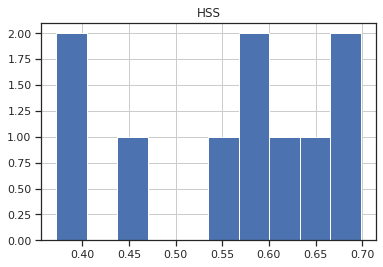

In [15]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.sn_l
X = df_all1k.iloc[:,1:]

# loop random seed(1)
np.random.seed(1)
HSS_ml = []

for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #ml model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)
  #ml_model = BernoulliNB().fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion matrix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_ml.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_ml[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000

print(pd.DataFrame(HSS_ml,columns=["HSS"]).describe())

sta, p = shapiro(HSS_ml)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_ml,columns=["HSS"]).hist();


**T test (1sample) compare machine learning HSS in a sample (n=10) versus meteorological model HSS at point 0 (0.28) and at point 1 (0.28). the alternative hypothesis is: the mean of HSS of the underlying distribution of the sample is greater than the given population HSS from meteorological model (popmean). Significance level (alpha) = 0.01**

In [16]:
import scipy.stats as stats

alpha = 0.01
sta0, p_value0 = stats.ttest_1samp(HSS_ml, popmean=0.28, alternative="greater")

print("\nalpha: ",alpha)
print("\nHSS list from machine learning test:",np.round(HSS_ml,2))
print("\np_value point 0:",p_value0)

if p_value0 < alpha:    
    print("\nwe are rejecting null hypothesis  H0:  HSS mean machine learning= HSS meteorological model point 0")
    print("\nwe are accepting alternative hypothesis: HSS mean machine learning is greater than HSS meteorological point 0")
else:
    print("\nwe are accepting null hypothesis:  H0 HSS mean machine learning = HSS meteorological model point 0")





alpha:  0.01

HSS list from machine learning test: [0.44 0.55 0.57 0.7  0.66 0.6  0.4  0.37 0.7  0.61]

p_value point 0: 2.0583797030591635e-05

we are rejecting null hypothesis  H0:  HSS mean machine learning= HSS meteorological model point 0

we are accepting alternative hypothesis: HSS mean machine learning is greater than HSS meteorological point 0


**Add time features**

In [17]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.weekofyear

In [18]:
Y = df_all1k.sn_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)
models

100%|██████████| 29/29 [00:20<00:00,  1.39it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,1.00,0.93,None,1.00,0.82
LGBMClassifier,1.00,0.93,None,1.00,1.29
BernoulliNB,0.79,0.90,None,0.88,0.10
GaussianNB,0.88,0.87,None,0.93,0.11
RandomForestClassifier,1.00,0.86,None,1.00,1.86
KNeighborsClassifier,1.00,0.86,None,1.00,0.59
BaggingClassifier,1.00,0.86,None,1.00,2.36
AdaBoostClassifier,1.00,0.86,None,1.00,3.51
DecisionTreeClassifier,0.99,0.85,None,0.99,0.43


In [19]:
# variables X
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'dir2', 'snow_prec2', 'snowlevel2', 'mod2',
       'wind_gust2', 'mslp2', 'temp2', 'rh2', 'visibility2', 'lhflx2',
       'lwflx2', 'conv_prec2', 'prec2', 'swflx2', 'shflx2', 'cape2', 'cin2',
       'cfh2', 'cfl2', 'cfm2', 'cft2', 'HGT5002', 'HGT8502', 'T5002', 'T8502',
       'hour', 'month', 'dayofyear', 'weekofyear'],
      dtype='object')

**LGBMClassifier with time variables**


Confusion marix  (Machine Learning)

col_0  No SN  SN   All
sn_l                  
No SN   1716   5  1721
SN         4   4     8
All     1720   9  1729
Heidke Skill Score: 0.47

Quality report (Machine Learning)

              precision  recall  f1-score  support
No SN              1.00    1.00      1.00  1721.00
SN                 0.44    0.50      0.47     8.00
accuracy           0.99    0.99      0.99     0.99
macro avg          0.72    0.75      0.73  1729.00
weighted avg       1.00    0.99      0.99  1729.00

Confusion marix  (Machine Learning)

col_0  No SN  SN   All
sn_l                  
No SN   1716   3  1719
SN         5   5    10
All     1721   8  1729
Heidke Skill Score: 0.55

Quality report (Machine Learning)

              precision  recall  f1-score  support
No SN              1.00    1.00      1.00  1719.00
SN                 0.62    0.50      0.56    10.00
accuracy           1.00    1.00      1.00     1.00
macro avg          0.81    0.75      0.78  1729.00
weighted av

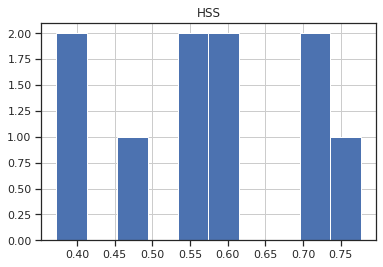

In [20]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.sn_l
X = df_all1k.iloc[:,1:]

# loop random seed (1)
np.random.seed(1)
HSS_t = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #machine learning model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion marix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_t.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_t[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
print(pd.DataFrame(HSS_t,columns=["HSS"]).describe())

# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
sta, p = shapiro(HSS_t)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_t,columns=["HSS"]).hist();


**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the HSS mean of the distribution underlying the sample without time variables is less than the HSS mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [21]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS_ml, HSS_t, alternative="less")

print("\nHSS without time variables:", np.round(HSS_ml,3))
print("\nHSS with time variables:", np.round(HSS_t,3))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the sample without time variables inputs is less than the HSS mean of the sample with time variables inputs")
else:
    print("\nwe are accepting null hypothesis:  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables")


HSS without time variables: [0.442 0.553 0.57  0.698 0.665 0.597 0.397 0.372 0.698 0.612]

HSS with time variables: [0.468 0.553 0.57  0.698 0.598 0.712 0.397 0.372 0.777 0.612]

alpha:  0.01

p_value point:  0.17784860704576017

we are accepting null hypothesis:  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables


****

**Save Machine learning model**

In [22]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("sn_lepp_d1.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=200))])


In [24]:
import sklearn
print(sklearn.__version__)

1.2.1


**ExtraTreesClassifier too big to be upload at github!!**


Confusion marix  (Machine Learning)

col_0  No SN  SN   All
sn_l                  
No SN   1718   3  1721
SN         4   4     8
All     1722   7  1729
Heidke Skill Score: 0.53

Quality report (Machine Learning)

              precision  recall  f1-score  support
No SN              1.00    1.00      1.00  1721.00
SN                 0.57    0.50      0.53     8.00
accuracy           1.00    1.00      1.00     1.00
macro avg          0.78    0.75      0.77  1729.00
weighted avg       1.00    1.00      1.00  1729.00

Confusion marix  (Machine Learning)

col_0  No SN  SN   All
sn_l                  
No SN   1712   7  1719
SN         3   7    10
All     1715  14  1729
Heidke Skill Score: 0.58

Quality report (Machine Learning)

              precision  recall  f1-score  support
No SN              1.00    1.00      1.00  1719.00
SN                 0.50    0.70      0.58    10.00
accuracy           0.99    0.99      0.99     0.99
macro avg          0.75    0.85      0.79  1729.00
weighted av

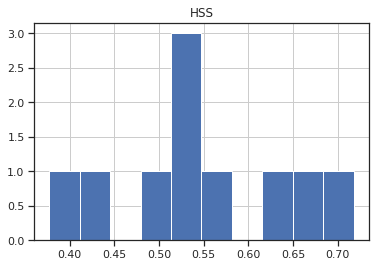

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.sn_l
X = df_all1k.iloc[:,1:]

# loop random seed (1)
np.random.seed(1)
HSS_plus = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #machine learning model
  ml_model = ExtraTreesClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion marix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_plus.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_plus[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
print(pd.DataFrame(HSS_plus,columns=["HSS"]).describe())

# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
sta, p = shapiro(HSS_plus)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_plus,columns=["HSS"]).hist();

**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the HSS mean of the distribution underlying the sample without time variables is less than the HSS mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [26]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS_t, HSS_plus, alternative="less")

print("\nHSS with LGBMClassifier:", np.round(HSS_t,3))
print("\nHSS with ExtraTreesClassifier:", np.round(HSS_plus,3))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HSS mean LGBMClassifier = HSS mean ExtraTreesClassifier")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the  LGBMClassifier is less than the HSS mean of ExtraTreesClassifier")
else:
    print("\nwe are accepting null hypothesis:  H0: LGBMClassifier = HSS mean ExtraTreesClassifier")


HSS with LGBMClassifier: [0.468 0.553 0.57  0.698 0.598 0.712 0.397 0.372 0.777 0.612]

HSS with ExtraTreesClassifier: [0.531 0.581 0.524 0.665 0.634 0.718 0.431 0.377 0.524 0.497]

alpha:  0.01

p_value point:  0.8096350455019532

we are accepting null hypothesis:  H0: LGBMClassifier = HSS mean ExtraTreesClassifier
